In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Thesis_work/DL_experiments'

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/16LLv0tl9NuELAOpNIA0EW8v8njV1fcVa/Thesis_work/DL_experiments


#Loading libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from imblearn.over_sampling import SMOTE

from sklearn import metrics
from sklearn.model_selection import train_test_split
#!pip install xgboost
from numpy import loadtxt
from sklearn.model_selection import cross_val_score

#Method for confusion matrix plot

In [3]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

def plot_confusion_matrix(Y, predicted):
  Y_predicted_classes = []
  for x in predicted:
    if x>=0.5:
        Y_predicted_classes.append(1)

    else:
        Y_predicted_classes.append(0)
#  print(len(Y), len(Y_predicted_classes))

  # accuracy: (tp + tn) / (p + n)
  accuracy = accuracy_score(Y, Y_predicted_classes)
  print('Accuracy: %f' % accuracy)
  # precision tp / (tp + fp)
  precision = precision_score(Y, Y_predicted_classes)
  print('Precision: %f' % precision)
  # recall: tp / (tp + fn)
  recall = recall_score(Y, Y_predicted_classes)
  print('Recall: %f' % recall)
  # f1: 2 tp / (2 tp + fp + fn)
  f1 = f1_score(Y, Y_predicted_classes)
  print('F1 score: %f' % f1)
  cf_matrix = confusion_matrix(Y,Y_predicted_classes)

  group_names = ['True Real','False Fake','False Real','True Fake']
  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  print(labels.shape)
  print(cf_matrix.shape)
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

#Load the dataset


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Thesis_work/DL_experiments/final_dataset_reviews_clean.csv')
# data.drop(columns=['Unnamed: 0'], inplace = True)
# data.head(2)

In [5]:
X=data.drop(columns=['Label'], axis =1, inplace=False)
y=data['Label']

#Train and test data

In [6]:
from sklearn.model_selection import train_test_split
X_train_all, X_test_all, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

##Features and label

In [7]:
X_train=X_train_all.drop(columns=['Sentiment','Date', 'Reviews', 'Reviews_clean', 'Features', 'Product_ID',	'Customer_Name', 'pid_encoded'], axis =1, inplace=False)
X_test=X_test_all.drop(columns=['Sentiment','Date', 'Reviews', 'Reviews_clean', 'Features', 'Product_ID',	'Customer_Name', 'pid_encoded'], axis =1, inplace=False)


In [8]:
X_train.shape

(3138, 14)

In [9]:
X_test.shape

(785, 14)

##Scaling the data

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)
# X_train = StandardScaler().fit_transform(X_train)
# X_test = StandardScaler().fit_transform(X_test)

#Converting the text files to vectors

In [11]:
results = set()
X_train_all['Reviews_clean'].str.lower().str.split().apply(results.update)
print(len(results))

5753


In [12]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_all['Reviews_clean'])
print(tokenizer.word_index)
print(len(tokenizer.word_index))


{'nahi': 1, 'bohat': 2, 'acha': 3, 'achi': 4, 'lekin': 5, 'kam': 6, 'aik': 7, 'miyar': 8, 'qemat': 9, 'istemal': 10, 'masnoat': 11, 'ap': 12, 'daraz': 13, 'sath': 14, 'size': 15, 'karta': 16, 'chez': 17, 'mere': 18, 'quality': 19, 'bilkul': 20, 'mayar': 21, 'pasand': 22, 'order': 23, 'sab': 24, 'rang': 25, 'karne': 26, 'waqai': 27, 'sirf': 28, 'terhan': 29, 'achay': 30, 'thek': 31, 'behtaren': 32, 'tor': 33, 'bad': 34, 'waqt': 35, 'aram': 36, 'mutmaen': 37, 'khush': 38, 'phone': 39, 'meri': 40, 'ziyada': 41, 'mila': 42, 'asan': 43, 'shirts': 44, 'diya': 45, 'kia': 46, 'apne': 47, 'lakin': 48, 'din': 49, 'bhot': 50, 'product': 51, 'sahi': 52, 'kyunkay': 53, 'mera': 54, 'jis': 55, 'shukriya': 56, 'itna': 57, 'tarsel': 58, 'bar': 59, 'aya': 60, 'sakta': 61, 'pehlay': 62, 'karte': 63, 'har': 64, 'munasib': 65, 'kisi': 66, 'da': 67, 'lagta': 68, 'agar': 69, 'bat': 70, 'jaisay': 71, 'iski': 72, 'hua': 73, 'price': 74, 'isko': 75, 'kharab': 76, 'thora': 77, 'abhi': 78, 'behtar': 79, 'game': 8

In [13]:
print(X_train_all['words_clean'].mean())
print(X_train_all[X_train_all['words_clean']==X_train_all['words_clean'].max()]['Reviews_clean'])
print(X_train_all['words_clean'].max())


14.079987253027406
2675    nahi pehli bar khail shuru diya nahi socha mer...
Name: Reviews_clean, dtype: object
130


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
max_feature = 2000
maxlen=80
emb_dim = 32
#vectorizer = CountVectorizer(max_features=max_feature)
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=max_feature)
tokenizer.fit_on_texts(X_train_all['Reviews_clean'])

sequences_train = tokenizer.texts_to_sequences(X_train_all['Reviews_clean'])
x_train_text = pad_sequences(sequences_train, maxlen=maxlen, padding='post')
sequences_test = tokenizer.texts_to_sequences(X_test_all['Reviews_clean'])
x_test_text = pad_sequences(sequences_test, maxlen=maxlen, padding='post')

print(x_train_text[9])

[  12  366 1673  848 1673  330  286   50  849  330   93 1391  134 1391
   34    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0]


##Callbacks Earlystopping

In [15]:
import tensorflow as tf
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=5)
epoch=100

#CLassification(1DCNN)

In [16]:
from keras.models import Sequential
from keras.layers import Embedding
from keras .layers import Dense
from keras.layers import Bidirectional
from keras.layers import LSTM
import keras
from keras import Model
from keras import models
from keras import layers
from keras .layers import Dense
emb_dim = 32
nlp_input = keras.Input(shape=(maxlen,), name="Review Text")

emb = Embedding(max_feature, emb_dim, input_length=maxlen)(nlp_input)
hidden = layers.Conv1D(16, 5, activation='relu')(emb)
hidden1 = layers.GlobalMaxPooling1D()(hidden)
nlp_out = layers.Dense(32, activation='relu')(hidden1)

meta_input = keras.Input(shape=(X_train.shape[1],), name="Behavioral features")

d1 = layers.Dense(8, activation='relu')(meta_input)
d2 = layers.Dense(4, activation='relu')(d1)
#d1 = Dense(8, activation='relu')(meta_input)
concat = keras.layers.concatenate([nlp_out, d2])
classifier = layers.Dense(16, activation='relu')(concat)
classifier1 = layers.Dense(8, activation='relu')(classifier)
classifier2 = layers.Dense(8, activation='relu')(classifier1)

output = Dense(1, activation='sigmoid')(classifier1)
model = Model(inputs=[nlp_input , meta_input], outputs=[output])

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Review Text (InputLayer)    [(None, 80)]                 0         []                            
                                                                                                  
 embedding (Embedding)       (None, 80, 32)               64000     ['Review Text[0][0]']         
                                                                                                  
 conv1d (Conv1D)             (None, 76, 16)               2576      ['embedding[0][0]']           
                                                                                                  
 Behavioral features (Input  [(None, 14)]                 0         []                            
 Layer)                                                                                       

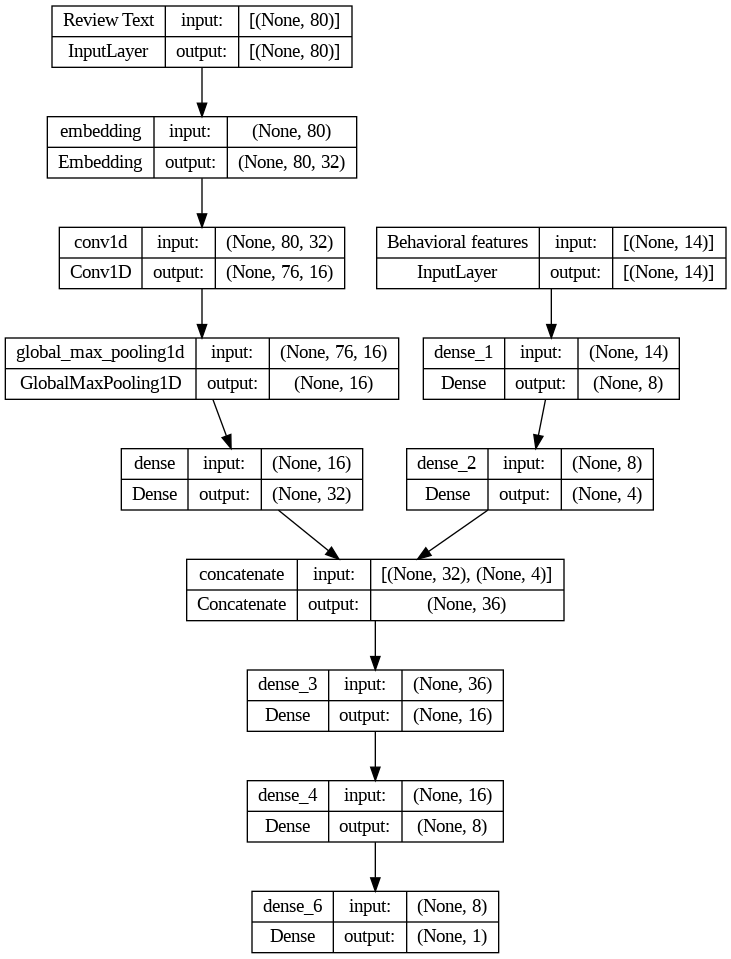

In [18]:
from tensorflow import keras
keras.utils.plot_model(model,show_shapes=True)

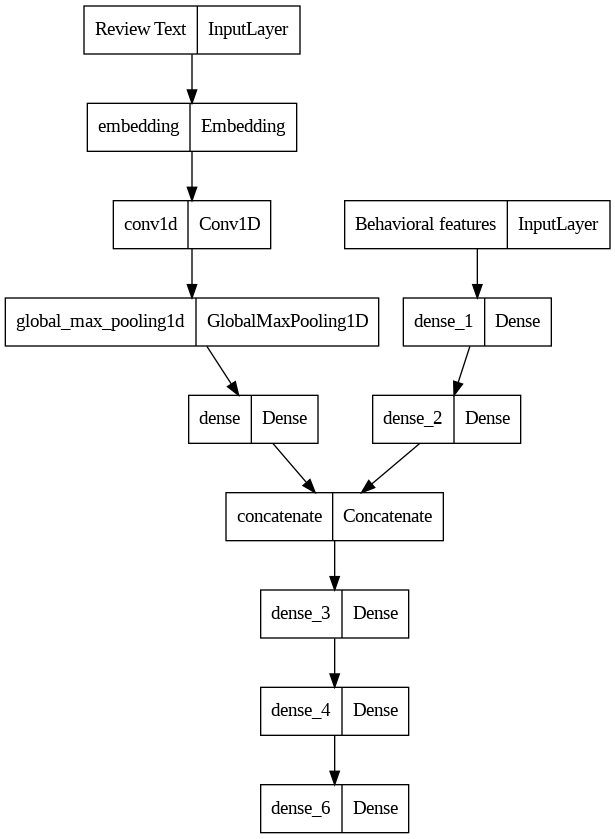

In [19]:
keras.utils.plot_model(model, "ticket_classifier.png")

In [20]:
model.compile(optimizer="adam",
              loss=["binary_crossentropy", "binary_crossentropy"],
              metrics=["accuracy"])
model.fit([x_train_text, X_train], y_train, epochs=epoch, batch_size=100, validation_split=0.1, callbacks=[es])

Epoch 1/100
29/29 [==============================] - 11s 190ms/step - loss: 0.5422 - accuracy: 0.8647 - val_loss: 0.4084 - val_accuracy: 0.8662
Epoch 2/100
29/29 [==============================] - 4s 125ms/step - loss: 0.4003 - accuracy: 0.8647 - val_loss: 0.3953 - val_accuracy: 0.8662
Epoch 3/100
29/29 [==============================] - 3s 115ms/step - loss: 0.3908 - accuracy: 0.8647 - val_loss: 0.3918 - val_accuracy: 0.8662
Epoch 4/100
29/29 [==============================] - 4s 146ms/step - loss: 0.3761 - accuracy: 0.8647 - val_loss: 0.3869 - val_accuracy: 0.8662
Epoch 5/100
29/29 [==============================] - 2s 79ms/step - loss: 0.3512 - accuracy: 0.8647 - val_loss: 0.3783 - val_accuracy: 0.8662
Epoch 6/100
29/29 [==============================] - 2s 66ms/step - loss: 0.2992 - accuracy: 0.8647 - val_loss: 0.3678 - val_accuracy: 0.8662


In [21]:
model.evaluate([x_test_text, X_test], y_test)

25/25 [==============================] - 0s 5ms/step - loss: 0.3770 - accuracy: 0.8650


[0.37699028849601746, 0.8649681806564331]

##confusion matrix plot

25/25 [==============================] - 0s 2ms/step
Accuracy: 0.864968
Precision: 0.000000
Recall: 0.000000
F1 score: 0.000000
(2, 2)
(2, 2)
 1/25 [>.............................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


25/25 [==============================] - 0s 2ms/step


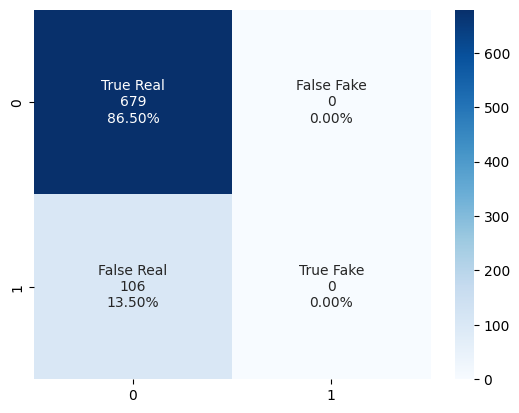

In [22]:
pred_cnn = model.predict([x_test_text, X_test])
plot_confusion_matrix(y_test, pred_cnn)
pred_cnn = np.where(model.predict([x_test_text, X_test]) > 0.5, 1,0)

#Classification models(BLSTM)

In [23]:
from keras.models import Sequential
from keras.layers import Embedding
from keras .layers import Dense
from keras.layers import Bidirectional
from keras.layers import LSTM
import keras
from keras import Model
nlp_input = keras.Input(shape=(maxlen,), name="Review Text")

emb = Embedding(max_feature, emb_dim, input_length=maxlen)(nlp_input)
hidden = Bidirectional(LSTM(16, return_sequences=True))(emb)
hidden1 = Bidirectional(LSTM(16, return_sequences=True))(hidden)

nlp_out = Bidirectional(LSTM(16))(hidden1)

meta_input = keras.Input(shape=(X_train.shape[1],))

d1 = Dense(8, activation='relu')(meta_input)
d2 = Dense(4, activation='relu')(d1)
#d1 = Dense(8, activation='relu')(meta_input)


concat = keras.layers.concatenate([nlp_out, d2])
classifier = Dense(32, activation='relu')(concat)
classifier1 = Dense(16, activation='relu')(classifier)
classifier2 = Dense(8, activation='relu')(classifier1)

output = Dense(1, activation='sigmoid')(classifier1)
blstm = Model(inputs=[nlp_input , meta_input], outputs=[output])

In [24]:
blstm.compile(optimizer="adam",
              loss=["binary_crossentropy", "binary_crossentropy"],
              metrics=["accuracy"])
blstm.fit([x_train_text, X_train], y_train, epochs=epoch, batch_size=100, validation_split=0.2, callbacks=[es])

Epoch 1/100
26/26 [==============================] - 16s 193ms/step - loss: 0.5059 - accuracy: 0.8661 - val_loss: 0.4298 - val_accuracy: 0.8599
Epoch 2/100
26/26 [==============================] - 4s 173ms/step - loss: 0.3970 - accuracy: 0.8661 - val_loss: 0.3991 - val_accuracy: 0.8599
Epoch 3/100
26/26 [==============================] - 3s 116ms/step - loss: 0.3781 - accuracy: 0.8661 - val_loss: 0.3862 - val_accuracy: 0.8599
Epoch 4/100
26/26 [==============================] - 2s 90ms/step - loss: 0.3497 - accuracy: 0.8661 - val_loss: 0.3884 - val_accuracy: 0.8599
Epoch 5/100
26/26 [==============================] - 2s 87ms/step - loss: 0.2974 - accuracy: 0.8916 - val_loss: 0.4211 - val_accuracy: 0.8328
Epoch 6/100
26/26 [==============================] - 2s 78ms/step - loss: 0.2256 - accuracy: 0.9231 - val_loss: 0.4537 - val_accuracy: 0.8471


##Evaluate Model

In [25]:
blstm.evaluate([x_test_text, X_test], y_test)

25/25 [==============================] - 0s 12ms/step - loss: 0.4256 - accuracy: 0.8586


[0.4256182312965393, 0.8585987091064453]

25/25 [==============================] - 2s 10ms/step
Accuracy: 0.858599
Precision: 0.459016
Recall: 0.264151
F1 score: 0.335329
(2, 2)
(2, 2)
25/25 [==============================] - 1s 18ms/step


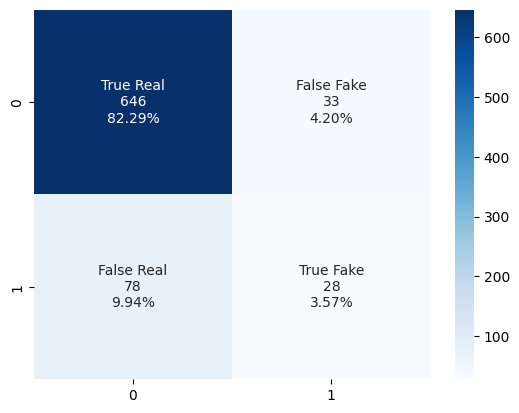

In [26]:
pred_blstm = blstm.predict([x_test_text, X_test])
plot_confusion_matrix(y_test, pred_blstm)
pred_blstm = np.where(blstm.predict([x_test_text, X_test]) > 0.5, 1,0)

#Classification models(LSTM)

In [27]:
from keras.models import Sequential
from keras.layers import Embedding
from keras .layers import Dense
from keras.layers import Bidirectional
from keras.layers import LSTM
import keras
from keras import Model
nlp_input = keras.Input(shape=(maxlen,), name="Review Text")

emb = Embedding(max_feature, emb_dim, input_length=maxlen)(nlp_input)
hidden = LSTM(16, return_sequences=True)(emb)
hidden1 = LSTM(16, return_sequences=True)(hidden)

nlp_out = LSTM(16)(hidden1)

meta_input = keras.Input(shape=(X_train.shape[1],))

d1 = Dense(8, activation='relu')(meta_input)
d2 = Dense(4, activation='relu')(d1)
#d1 = Dense(8, activation='relu')(meta_input)


concat = keras.layers.concatenate([nlp_out, d2])
classifier = Dense(32, activation='relu')(concat)
classifier1 = Dense(16, activation='relu')(classifier)
classifier2 = Dense(8, activation='relu')(classifier1)

output = Dense(1, activation='sigmoid')(classifier1)
lstm = Model(inputs=[nlp_input , meta_input], outputs=[output])

In [28]:
lstm.compile(optimizer="adam",
              loss=["binary_crossentropy", "binary_crossentropy"],
              metrics=["accuracy"])
lstm.fit([x_train_text, X_train], y_train, epochs=epoch, batch_size=100, validation_split=0.1, callbacks=[es])

Epoch 1/100
29/29 [==============================] - 11s 153ms/step - loss: 0.6282 - accuracy: 0.7394 - val_loss: 0.4803 - val_accuracy: 0.8662
Epoch 2/100
29/29 [==============================] - 3s 87ms/step - loss: 0.4156 - accuracy: 0.8647 - val_loss: 0.3957 - val_accuracy: 0.8662
Epoch 3/100
29/29 [==============================] - 3s 88ms/step - loss: 0.3976 - accuracy: 0.8647 - val_loss: 0.3931 - val_accuracy: 0.8662
Epoch 4/100
29/29 [==============================] - 3s 107ms/step - loss: 0.3963 - accuracy: 0.8647 - val_loss: 0.3924 - val_accuracy: 0.8662
Epoch 5/100
29/29 [==============================] - 3s 84ms/step - loss: 0.3954 - accuracy: 0.8647 - val_loss: 0.3918 - val_accuracy: 0.8662
Epoch 6/100
29/29 [==============================] - 2s 68ms/step - loss: 0.3949 - accuracy: 0.8651 - val_loss: 0.3902 - val_accuracy: 0.8662


##Evaluate Model

25/25 [==============================] - 1s 6ms/step
Accuracy: 0.864968
Precision: 0.000000
Recall: 0.000000
F1 score: 0.000000
(2, 2)
(2, 2)
 1/25 [>.............................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


25/25 [==============================] - 0s 5ms/step


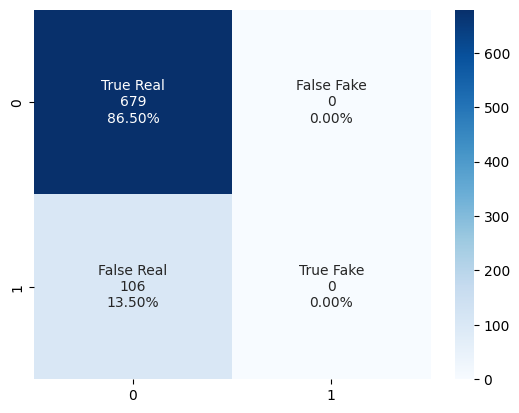

In [29]:
lstm.evaluate([x_test_text, X_test], y_test)
pred_lstm = lstm.predict([x_test_text, X_test])
plot_confusion_matrix(y_test, pred_lstm)
pred_lstm = np.where(lstm.predict([x_test_text, X_test]) > 0.5, 1,0)

#Dense Neural Network

In [30]:
meta_input = keras.Input(shape=(X_train.shape[1],))
d1 = Dense(16, activation='tanh')(meta_input)
d2 = Dense(8, activation='tanh')(d1)
d3 = Dense(4, activation='tanh')(d2)
output = Dense(1, activation='sigmoid')(d3)
dnn = Model(inputs=[meta_input], outputs=[output])


dnn.compile(optimizer='nadam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = dnn.fit(X_train,
                  y_train,
                    epochs=epoch,
                    batch_size=40, validation_split=0.1, callbacks=[es])

Epoch 1/100
71/71 [==============================] - 3s 6ms/step - loss: 0.5490 - accuracy: 0.7493 - val_loss: 0.4248 - val_accuracy: 0.8662
Epoch 2/100
71/71 [==============================] - 0s 4ms/step - loss: 0.4119 - accuracy: 0.8647 - val_loss: 0.4020 - val_accuracy: 0.8662
Epoch 3/100
71/71 [==============================] - 0s 5ms/step - loss: 0.4023 - accuracy: 0.8647 - val_loss: 0.3981 - val_accuracy: 0.8662
Epoch 4/100
71/71 [==============================] - 0s 4ms/step - loss: 0.3994 - accuracy: 0.8647 - val_loss: 0.3959 - val_accuracy: 0.8662
Epoch 5/100
71/71 [==============================] - 0s 5ms/step - loss: 0.3974 - accuracy: 0.8647 - val_loss: 0.3936 - val_accuracy: 0.8662
Epoch 6/100
71/71 [==============================] - 0s 6ms/step - loss: 0.3954 - accuracy: 0.8647 - val_loss: 0.3909 - val_accuracy: 0.8662


25/25 [==============================] - 0s 2ms/step
Accuracy: 0.864968
Precision: 0.000000
Recall: 0.000000
F1 score: 0.000000
(2, 2)
(2, 2)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


25/25 [==============================] - 0s 2ms/step


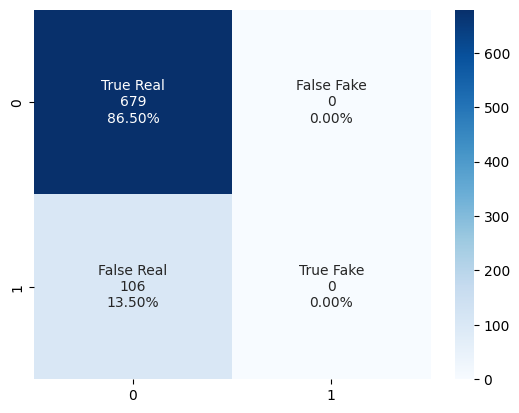

In [31]:
pred_dnn = dnn.predict(X_test)
plot_confusion_matrix(y_test, pred_dnn)
pred_dnn = np.where(dnn.predict(X_test) > 0.5, 1,0)

#**Best model Accuracy and F-score**

We tested six different models and now, we check which one is the best:

In [32]:
cnn_acc = accuracy_score(pred_cnn, y_test)
lstm_acc = accuracy_score(pred_lstm, y_test)
blstm_acc = accuracy_score(pred_blstm, y_test)
dnn_acc = accuracy_score(pred_dnn, y_test)



cnn_f1 = f1_score(pred_cnn, y_test)
lstm_f1 = f1_score(pred_lstm, y_test)
blstm_f1 = f1_score(pred_blstm, y_test)
dnn_f1 = f1_score(pred_dnn, y_test)


In [33]:
models = pd.DataFrame({
                      'Model': ['1D-CNN', 'LSTM', 'BLSTM', 'Dense Neural'],
                      'Accuracy': [cnn_acc, lstm_acc, blstm_acc, dnn_acc],
                      'F-Score': [cnn_f1,lstm_f1, blstm_f1, dnn_f1]
                       })
models.sort_values(by='F-Score', ascending=False, inplace=True)
models.reset_index()

,index,Model,Accuracy,F-Score
0,2,BLSTM,0.858599,0.335329
1,0,1D-CNN,0.864968,0.000000
2,1,LSTM,0.864968,0.000000
3,3,Dense Neural,0.864968,0.000000


In [34]:
models.to_csv("expsettingI_DL_default_updated.csv", index=False)

#Grouped confusion matrix

(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)


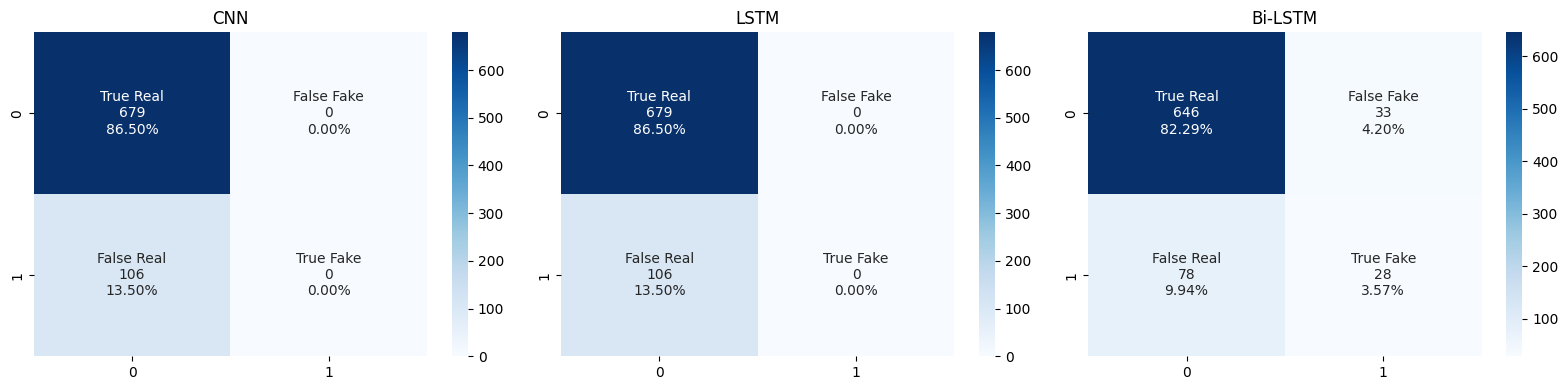

In [35]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

def plot_grouped_cm(Y, predicted, i, model):
  Y_predicted_classes = []
  for x in predicted:
    if x>=0.5:
        Y_predicted_classes.append(1)

    else:
        Y_predicted_classes.append(0)
#  print(len(Y), len(Y_predicted_classes))
  cf_matrix = confusion_matrix(Y,Y_predicted_classes)

  group_names = ['True Real','False Fake','False Real','True Fake']
  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  print(labels.shape)
  print(cf_matrix.shape)
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', ax =axes[i])
  axes[i].set_title(model)

plot_grouped_cm(y_test, pred_cnn, 0, "CNN")
plot_grouped_cm(y_test, pred_lstm, 1, "LSTM")
plot_grouped_cm(y_test, pred_blstm, 2, "Bi-LSTM")
fig.tight_layout()
fig.savefig("expsettingI_updated.png")